# EDA
* 2023/05/17  
参考URL: <https://www.kaggle.com/code/ayushs9020/understanding-the-competition-icr-eda>
train.csvのEDAはあんまり参考ならんかった  
greeks.csvについては詳しく書いてそうだったから今度確認

## コンペ概要
ICRとは、加齢に伴う健康状態の発見と診断を目的としたプロセス。  
健康診断では、病歴、身体検査、特定の検査などを総合的に評価し、健康状態を総合的に判断し、加齢に関連する状態を特定する。  
その目的は、潜在的な問題を早期に発見し、加齢に伴う健康上の懸念に適時に介入し管理すること。
ICRは、医療従事者が健康的な加齢を促進するために、予防策を調整し、個別の治療計画を策定するのを支援する。

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 

In [2]:
train_data = pd.read_csv("../data/train.csv")

In [3]:
train_data.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [4]:
### IDは削除して大丈夫
train_data.drop("Id", axis=1, inplace=True)

### データ型
* EJだけobject型

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      557 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      615 non-null    float64
 16  CC      614 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    float64
 22  CS

### EJの確認
* AとBがある
* A = 0, B=0に変換

In [6]:
train_data.EJ.value_counts()

EJ
B    395
A    222
Name: count, dtype: int64

In [7]:
train_data.EJ = np.where(train_data.EJ == "A", 1, 0)

### 欠損値の確認

In [8]:
null_counts = train_data.isnull().sum()
null_counts[null_counts!=0]

BQ    60
CB     2
CC     3
DU     1
EL    60
FC     1
FL     1
FS     2
GL     1
dtype: int64

In [9]:
train_data.Class.value_counts()

Class
0    509
1    108
Name: count, dtype: int64

参考URL: https://www.kaggle.com/code/raddar/icr-competition-analysis-and-findings

# BNは年齢

In [10]:
data = pd.read_csv("../data/train.csv")
greeks = pd.read_csv("../data/greeks.csv")

In [61]:
# dataとgreeksのキーを抽出
key = data.columns.intersection(greeks.columns).values[0]
# データフレームを結合
data = pd.merge(data, greeks, on = key)

In [19]:
data.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,GF,GH,GI,GL,Class,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,2003.810319,22.136229,69.834944,0.120343,1,B,C,G,D,3/19/2019
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,27981.562750,29.135430,32.131996,21.978000,0,A,C,M,B,Unknown
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,13676.957810,28.022851,35.192676,0.196941,0,A,C,M,B,Unknown
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,2094.262452,39.948656,90.493248,0.155829,0,A,C,M,B,Unknown
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8524.370502,45.381316,36.262628,0.096614,1,D,B,F,B,3/25/2020


In [33]:
BN_class_count = data.groupby('BN')['Class'].agg({'count','sum'}).reset_index()
BN_class_count.head()

,BN,count,sum
0,9.8868,2,0
1,10.2399,2,0
2,10.5930,2,0
3,10.9461,1,0
4,11.2992,1,0


### 最も近い20個のデータ・ポイントが他のクラスであるケースを見つける；

knn=20で、そのようなサンプルが8つあり、すべてClass=1から来ている。つまり、陽性サンプルの7％は判別が難しいデータポイントである。
(原文: 7% of the positive samples can be considered "hard")

5フォールドのクロスバリデーションをし、これらの8つのケースがフォールドに一様に分布していると仮定すると、フォールドスコアが、1つか2つの極端に難しいサンプルに大きく依存することを意味し、他のすべてのサンプルは、実際にはMLモデルで検出することがはるかに簡単。
→PublicLBでは判別が簡単な点が多い？

In [51]:
# 整数化された訓練データ（欠損値は-1で埋める
x = pd.read_csv("../data/train_integerized.csv").fillna(-1)
x.drop(['Id', 'EJ', 'Class'], axis=1, inplace=True)
# TSNE
from sklearn.manifold import TSNE
# 次元数を２に指定
tsne = TSNE(2)
tsne_result = tsne.fit_transform(x)

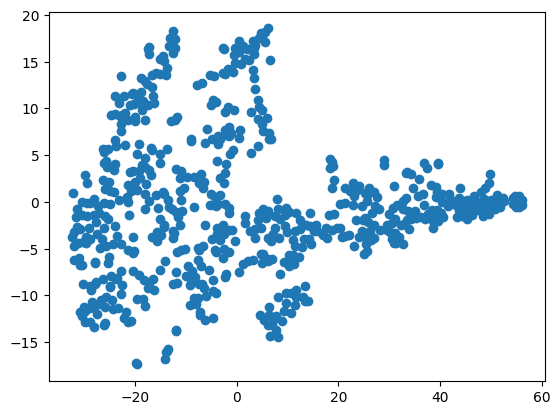

In [57]:
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])

In [70]:
# 2foldでのKNN
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(20)
knn2 = KNeighborsClassifier(20)
knn_model1 = knn1.fit(tsne_result[308:, ], data['Class'][308:])
knn_model2 = knn2.fit(tsne_result[:308, ], data['Class'][:308])

# 2つのリストを連結
oof = knn_model1.predict_proba(tsne_result[:308, ])[:, 1].tolist() + knn_model2.predict_proba(tsne_result[308:, ])[:, 1].tolist()


In [63]:
res = pd.DataFrame({'prob': oof, 'class': data['Class']})
res.loc[((res['class']==0) & (res.prob==1)) | ((res['class']==1) & (res.prob==0))]

,prob,class
93,0.0,1
145,0.0,1
186,0.0,1
193,0.0,1
371,0.0,1
434,0.0,1
467,0.0,1
559,0.0,1
